In [238]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [240]:
# Importing the dataset
sales = pd.read_csv('MonthlySales.csv',index_col=0)
sales.head()

,sales
month,
2013-01-01,14236.90
2013-02-01,4519.89
2013-03-01,55691.01
2013-04-01,28295.35
2013-05-01,23648.29


In [113]:
sales.tail()

,sales
month,
2016-08-01,63120.89
2016-09-01,87866.65
2016-10-01,77776.92
2016-11-01,118447.83
2016-12-01,83829.32


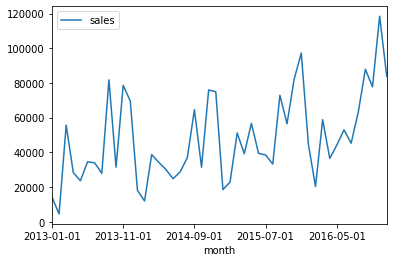

In [115]:
sales.plot()

In [ ]:
# From the above plot it is evident that there is some trend. But it is more towards a stationary time series
# A stationary time series is one with constant mean and standard deviation
# Now let us transform this to a moving avaerage(method to smooth the time series)

In [117]:
sales_mean=sales.rolling(window=10).mean()
sales_mean

,sales
month,
2013-01-01,NaN
2013-02-01,NaN
2013-03-01,NaN
2013-04-01,NaN
2013-05-01,NaN
2013-06-01,NaN
2013-07-01,NaN
2013-08-01,NaN
2013-09-01,NaN


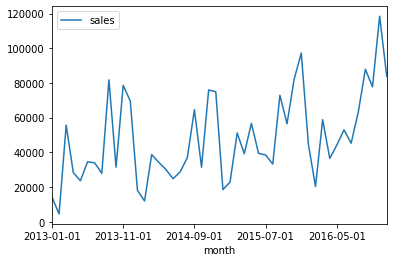

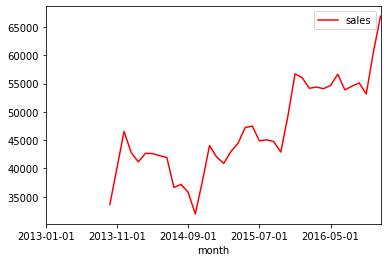

In [121]:
sales.plot()
sales_mean.plot(color='red')

In [ ]:
#Baseline model
# Assumption- recent history is the past reflection of the future

In [132]:
series_value=sales.values
series_value

array([[ 14236.9 ],
       [  4519.89],
       [ 55691.01],
       [ 28295.35],
       [ 23648.29],
       [ 34595.13],
       [ 33946.39],
       [ 27909.47],
       [ 81777.35],
       [ 31453.39],
       [ 78628.72],
       [ 69545.62],
       [ 18174.08],
       [ 11951.41],
       [ 38726.25],
       [ 34195.21],
       [ 30131.69],
       [ 24797.29],
       [ 28765.33],
       [ 36898.33],
       [ 64595.92],
       [ 31404.92],
       [ 75972.56],
       [ 74919.52],
       [ 18542.49],
       [ 22867.71],
       [ 51186.22],
       [ 39248.59],
       [ 56691.08],
       [ 39430.44],
       [ 38440.76],
       [ 33265.56],
       [ 72908.11],
       [ 56463.13],
       [ 82192.32],
       [ 97237.42],
       [ 44703.14],
       [ 20301.13],
       [ 58872.35],
       [ 36521.54],
       [ 44261.11],
       [ 52981.73],
       [ 45264.42],
       [ 63120.89],
       [ 87866.65],
       [ 77776.92],
       [118447.83],
       [ 83829.32]])

In [136]:
value=pd.DataFrame(series_value)
value

,0
0,14236.90
1,4519.89
2,55691.01
3,28295.35
4,23648.29
5,34595.13
6,33946.39
7,27909.47
8,81777.35
9,31453.39


In [137]:
sales.df=pd.concat([value,value.shift(1)],axis=1)
sales.df

,0,0
0,14236.90,NaN
1,4519.89,14236.90
2,55691.01,4519.89
3,28295.35,55691.01
4,23648.29,28295.35
5,34595.13,23648.29
6,33946.39,34595.13
7,27909.47,33946.39
8,81777.35,27909.47
9,31453.39,81777.35


In [143]:
sales.df.columns=['Actual_sales','Forecast_sales']
sales.df

,Actual_sales,Forecast_sales
0,14236.90,NaN
1,4519.89,14236.90
2,55691.01,4519.89
3,28295.35,55691.01
4,23648.29,28295.35
5,34595.13,23648.29
6,33946.39,34595.13
7,27909.47,33946.39
8,81777.35,27909.47
9,31453.39,81777.35


In [146]:
# Finding error
from sklearn.metrics import mean_squared_error
import numpy as np

In [148]:
# Use head() to find any NaN values
sales.df.head()

,Actual_sales,Forecast_sales
0,14236.90,NaN
1,4519.89,14236.90
2,55691.01,4519.89
3,28295.35,55691.01
4,23648.29,28295.35


In [149]:
# Use tail() to find any NaN values
sales.df.tail()

,Actual_sales,Forecast_sales
43,63120.89,45264.42
44,87866.65,63120.89
45,77776.92,87866.65
46,118447.83,77776.92
47,83829.32,118447.83


In [150]:
#Removing NaN values
sales.df=sales.df[1:47]
sales.df.head()

,Actual_sales,Forecast_sales
1,4519.89,14236.90
2,55691.01,4519.89
3,28295.35,55691.01
4,23648.29,28295.35
5,34595.13,23648.29


In [151]:
sales_error=mean_squared_error(sales.df.Actual_sales, sales.df.Forecast_sales)
sales_error

750200415.7874458

In [152]:
np.sqrt(sales_error)

27389.78670576764

In [ ]:
#Using ARIMA
#ARIMA - Auto Regressive(p) Integrated(d) Moving Average(q)

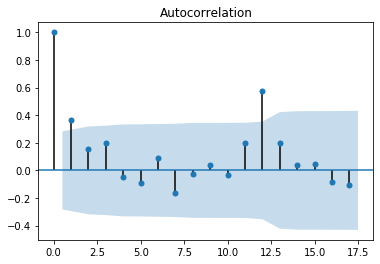

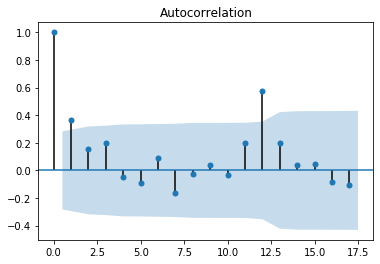

In [154]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# to predict value of q
plot_acf(sales)

In [ ]:
# At 0, correlation between actual and predicted value is 1
# Here 0,1 are above crtical limits
#Therefore, we can take q=1,2

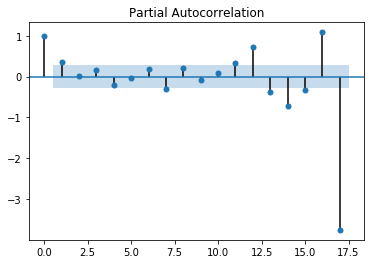

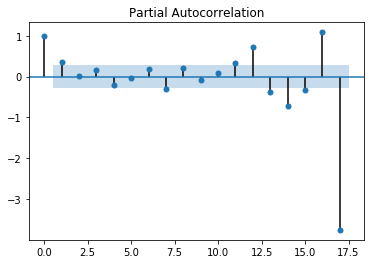

In [155]:
#To predict value of p
plot_pacf(sales)

In [ ]:
# Here also, we can p=1(above critical level)
# Also d=0, as the graph is stationary

In [157]:
# AR Model
X = sales.values
sales.shape
train = X[0:40] # 40 data as train data
test = X[40:]  # 8 data as test data

In [180]:
train.size

40

In [181]:
test.size

8

In [158]:
from statsmodels.tsa.ar_model import AR

model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [184]:
predictions = model_ar_fit.predict(start=40,end=47)
predictions.size

8

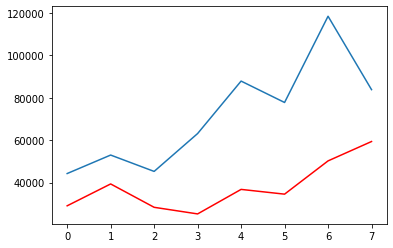

In [185]:
plt.plot(test)
plt.plot(predictions,color='red')

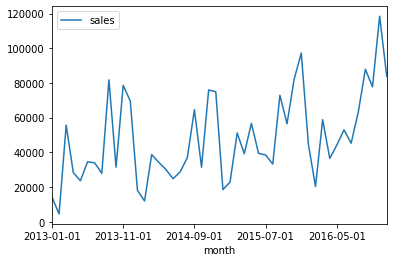

In [91]:
sales.plot()

In [186]:
from statsmodels.tsa.arima_model import ARIMA

In [234]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
# lesser value of aic , the better
model_arima = ARIMA(train,order=(4,0,4))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

919.2306444857702


In [235]:
predictions= model_arima_fit.forecast(steps=8)[0]
predictions

array([25531.45600378, 41748.97805561, 23108.95658828, 36150.37856499,
       59183.81741024, 43242.02981248, 53975.17508485, 70416.73637159])

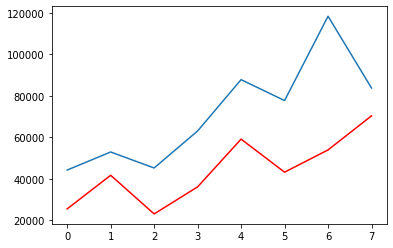

In [236]:
plt.plot(test)
plt.plot(predictions,color='red')

In [209]:
mean_squared_error(test,predictions)

1384699086.253102

In [210]:
np.sqrt(mean_squared_error(test,predictions))

37211.54506672764

In [211]:
import itertools
p=d=q=range(0,7)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 4, 6),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (0, 5, 6),
 (0, 6, 0),
 (0, 6, 1),
 (0, 6, 2),
 (0, 6, 3),
 (0, 6, 4),
 (0, 6, 5),
 (0, 6, 6),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 2, 6),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 3, 6),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1,

In [212]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 918.5926597475676
(0, 0, 1) 918.9890593275851
(0, 0, 2) 920.7965579392387
(0, 0, 3) 922.2733412979351
(0, 0, 4) 924.2350931756126
(0, 0, 5) 919.1013832433341
(0, 0, 6) 921.1047965350981
(0, 1, 0) 914.6958825189329
(0, 1, 1) 897.966808875858
(0, 1, 2) 899.269223417432
(0, 2, 0) 931.0214130356316
(0, 2, 1) 897.8730052007445
(1, 0, 0) 919.1717200029792
(1, 0, 1) 924.3007725727925
(1, 1, 0) 910.1332897112462
(1, 1, 1) 899.3925536570301
(1, 1, 4) 929.9428784025281
(1, 2, 0) 917.5813875198659
(1, 2, 1) 894.0049520455659
(1, 2, 3) 890.4509931742995
(1, 2, 4) 891.2305971871714
(2, 0, 0) 921.0996947240153
(2, 0, 1) 922.7000166227314
(2, 0, 2) 924.9850739476832
(2, 1, 0) 905.5386439846798
(2, 1, 1) 901.1297463903578
(2, 2, 0) 903.3894457719801
(2, 2, 1) 890.0596612288431
(3, 0, 0) 922.1639646325065
(3, 0, 1) 923.8295376746279
(3, 1, 0) 907.4901189112577
(3, 1, 1) 902.8191153443618
(3, 2, 0) 900.7695897383493
(4, 0, 0) 923.0267838499606
(4, 0, 1) 924.7411066459299
(4, 0, 4) 919.23064448